# Question 1. Import the libraries and load the data.

In [1]:
#Libraries needed
import pandas as pd
import numpy as np

# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
#the library below is useful as it helps calculate the distance between the data points and their respective centroids. 
from scipy.spatial.distance import cdist

In [2]:
sales_conversion= pd.read_csv("KAG_conversion_data.csv")
sales_conversion.sample(10)

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
200   748295              936          111016  45-49      F        27   
793  1121661             1178          144634  45-49      M        27   
144   738560              936          109844  40-44      F        64   
208   776334              936          115487  45-49      F        10   
100   735140              936          108809  40-44      F        26   
664  1121369             1178          144585  35-39      M        28   
286   777638              936          115717  40-44      M         7   
851  1121791             1178          144655  30-34      F        23   
388   781354              936          116371  35-39      F        10   
72    734605              936          108720  40-44      M        36   

     Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
200         9240       3    6.040000                 1                    0  
793       517801     105  181.720001                 3                    0  
144         1338       0    0.000000                 1                    0  
208       191223      48   76.410001                 1                    0  
100         6907       2    2.350000                 1                    0  
664       826205     125  232.370001                 5                    1  
286         1781       0    0.000000                 1                    1  
851         6838       0    0.000000                 1                    0  
388         6424       1    0.530000                 1                    0  
72           834       0    0.000000                 1                    0

In [3]:
sales_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


# Question 2. Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.

In [4]:
sales_conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [5]:
#Dummy encoding the categorical columns
X = pd.get_dummies(sales_conversion, columns=["age","gender"]).head()
X.head()

ad_id  xyz_campaign_id  fb_campaign_id  interest  Impressions  Clicks  \
0  708746              916          103916        15         7350       1   
1  708749              916          103917        16        17861       2   
2  708771              916          103920        20          693       0   
3  708815              916          103928        28         4259       1   
4  708818              916          103928        28         4133       1   

   Spent  Total_Conversion  Approved_Conversion  age_30-34  age_35-39  \
0   1.43                 2                    1          1          0   
1   1.82                 2                    0          1          0   
2   0.00                 1                    0          1          0   
3   1.25                 1                    0          1          0   
4   1.29                 1                    1          1          0   

   age_40-44  age_45-49  gender_F  gender_M  
0          0          0         0         1  
1          0          0         0         1  
2          0          0         0         1  
3          0          0         0         1  
4          0          0         0         1

# Question 3. Using a heat map to show the correlation in the data.

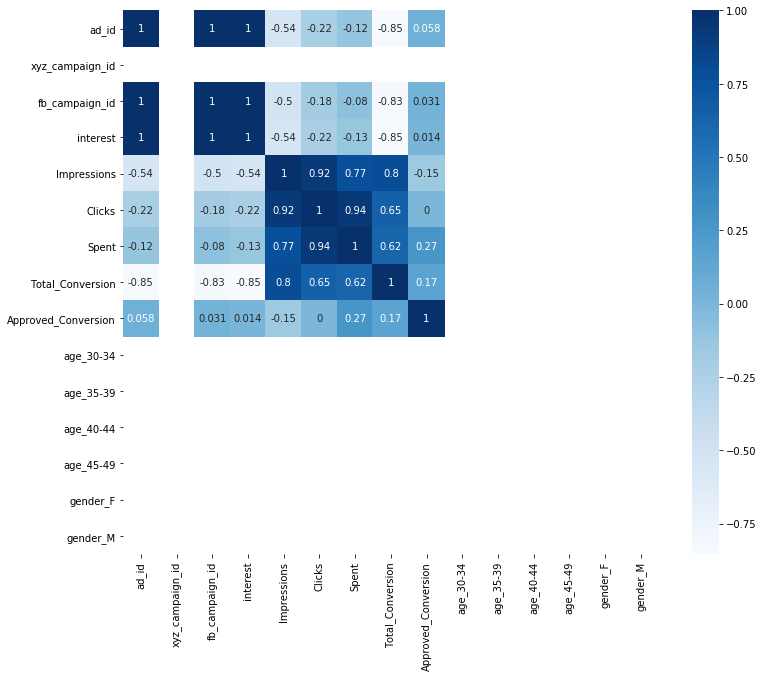

In [6]:
#Getting the correlation of the data
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

## a. Drop the first 4 columns in the data frame X.

In [7]:
#Dropping the first 4 columns of dataframe X which are age columns using .contains to get all the age columns at once and drop them
X.drop((X.columns[X.columns.str.contains('age')]),axis=1, inplace= True)
X.head()

ad_id  xyz_campaign_id  fb_campaign_id  interest  Impressions  Clicks  \
0  708746              916          103916        15         7350       1   
1  708749              916          103917        16        17861       2   
2  708771              916          103920        20          693       0   
3  708815              916          103928        28         4259       1   
4  708818              916          103928        28         4133       1   

   Spent  Total_Conversion  Approved_Conversion  gender_F  gender_M  
0   1.43                 2                    1         0         1  
1   1.82                 2                    0         0         1  
2   0.00                 1                    0         0         1  
3   1.25                 1                    0         0         1  
4   1.29                 1                    1         0         1

## b. Basing your answer on what can be seen in the heat map, why did we drop these columns?

The age columns had to be dropped because they had a blank correlations towards other columns 

# Question 4. Using the elbow method:

In [8]:
# By Assumation we have 4 different fb_campaign_ids
# k = 4
km = KMeans(n_clusters=4)


In [9]:
# Prep
xfeatures = X[['interest','Impressions','Clicks']]

In [10]:
# Fit n Predict
clusters = km.fit_predict(xfeatures)

In [11]:
# Get all the Labels(Clusters)
km.labels_

array([3, 1, 2, 0, 0])

In [12]:
clusters

array([3, 1, 2, 0, 0])

In [13]:
# Check if predicted clusters is the same as our labels
clusters is km.labels_

True

In [14]:
# Centroid/Center
km.cluster_centers_

array([[2.8000e+01, 4.1960e+03, 1.0000e+00],
       [1.6000e+01, 1.7861e+04, 2.0000e+00],
       [2.0000e+01, 6.9300e+02, 0.0000e+00],
       [1.5000e+01, 7.3500e+03, 1.0000e+00]])

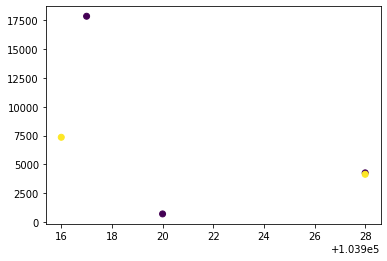

In [15]:
plt.scatter(X['fb_campaign_id'],X['Impressions'],c=X['Approved_Conversion'])

In [16]:
X.shape

(5, 11)

## a. Determine the best number of clusters for the data in the range of 2 to 20.

In [17]:
wss_list = []
wss = 0
K = range(2,20)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=200).fit(X)
    wss = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))
    wss_list.append(wss)
    print(k, '=>', wss)

2 => 6849.884627140272
3 => 4206.450561060397
4 => 126.03968264002
5 => 0.0


ValueError: n_samples=5 should be >= n_clusters=6

## b. Also include the graphical plot for the elbow

In [ ]:
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method showing the optimal K', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# Question 5. Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.

In [ ]:
kmeans = KMeans(n_clusters=, max_iter=300).fit(X)
print(kmeans.cluster_centers_)  

# Question 6. Use the model to predict the labels from the data and save them to variable y_means.

# Question 7. Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’.

# Question 8. Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:

## a. Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?

## b. Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

# Question 9. Perform the same analysis using hierarchical clustering and compare the results in terms of the number of useable clusters.